In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
import seaborn as sns
df = pd.read_csv('database_24_25.csv')


In [25]:
!pip install fake-useragent


In [26]:
!pip install beautifulsoup4

In [27]:
# Basic data exploration
print("First few rows of the dataset:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nBasic statistics:")
print(df.describe())

First few rows of the dataset:
          Player   Tm  Opp Res     MP  FG  FGA    FG%  3P  3PA  ...  DRB  TRB  \
0   Jayson Tatum  BOS  NYK   W  30.30  14   18  0.778   8   11  ...    4    4   
1  Anthony Davis  LAL  MIN   W  37.58  11   23  0.478   1    3  ...   13   16   
2  Derrick White  BOS  NYK   W  26.63   8   13  0.615   6   10  ...    3    3   
3   Jrue Holiday  BOS  NYK   W  30.52   7    9  0.778   4    6  ...    2    4   
4  Miles McBride  NYK  BOS   L  25.85   8   10  0.800   4    5  ...    0    0   

   AST  STL  BLK  TOV  PF  PTS  GmSc        Data  
0   10    1    1    1   1   37  38.1  2024-10-22  
1    4    1    3    1   1   36  34.0  2024-10-22  
2    4    1    0    0   1   24  22.4  2024-10-22  
3    4    1    0    0   2   18  19.5  2024-10-22  
4    2    0    0    1   1   22  17.8  2024-10-22  

[5 rows x 25 columns]

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 25 columns):
 #   Column  Non-Null Count  

In [31]:
# Data cleaning - convert MP (minutes played) to numeric
df['MP'] = pd.to_numeric(df['MP'], errors='coerce')

# 1. Top Performers Analysis
def top_performers():
    # Top scorers
    top_scorers = df.groupby('Player')['PTS'].mean().sort_values(ascending=False).head(10)

    # Most efficient players (by Game Score)
    top_efficient = df.groupby('Player')['GmSc'].mean().sort_values(ascending=False).head(10)

    # Best shooters (FG% with minimum 5 FGA per game)
    qualified_players = df[df['FGA'] >= 5]
    best_shooters = qualified_players.groupby('Player')['FG%'].mean().sort_values(ascending=False).head(10)

    # Best 3-point shooters (with minimum 2 3PA per game)
    qualified_3pt = df[df['3PA'] >= 2]
    best_3pt_shooters = qualified_3pt.groupby('Player')['3P%'].mean().sort_values(ascending=False).head(10)

    # Return the calculated values
    return top_scorers, top_efficient, best_shooters, best_3pt_shooters #This will return the variables so the other parts of the code c

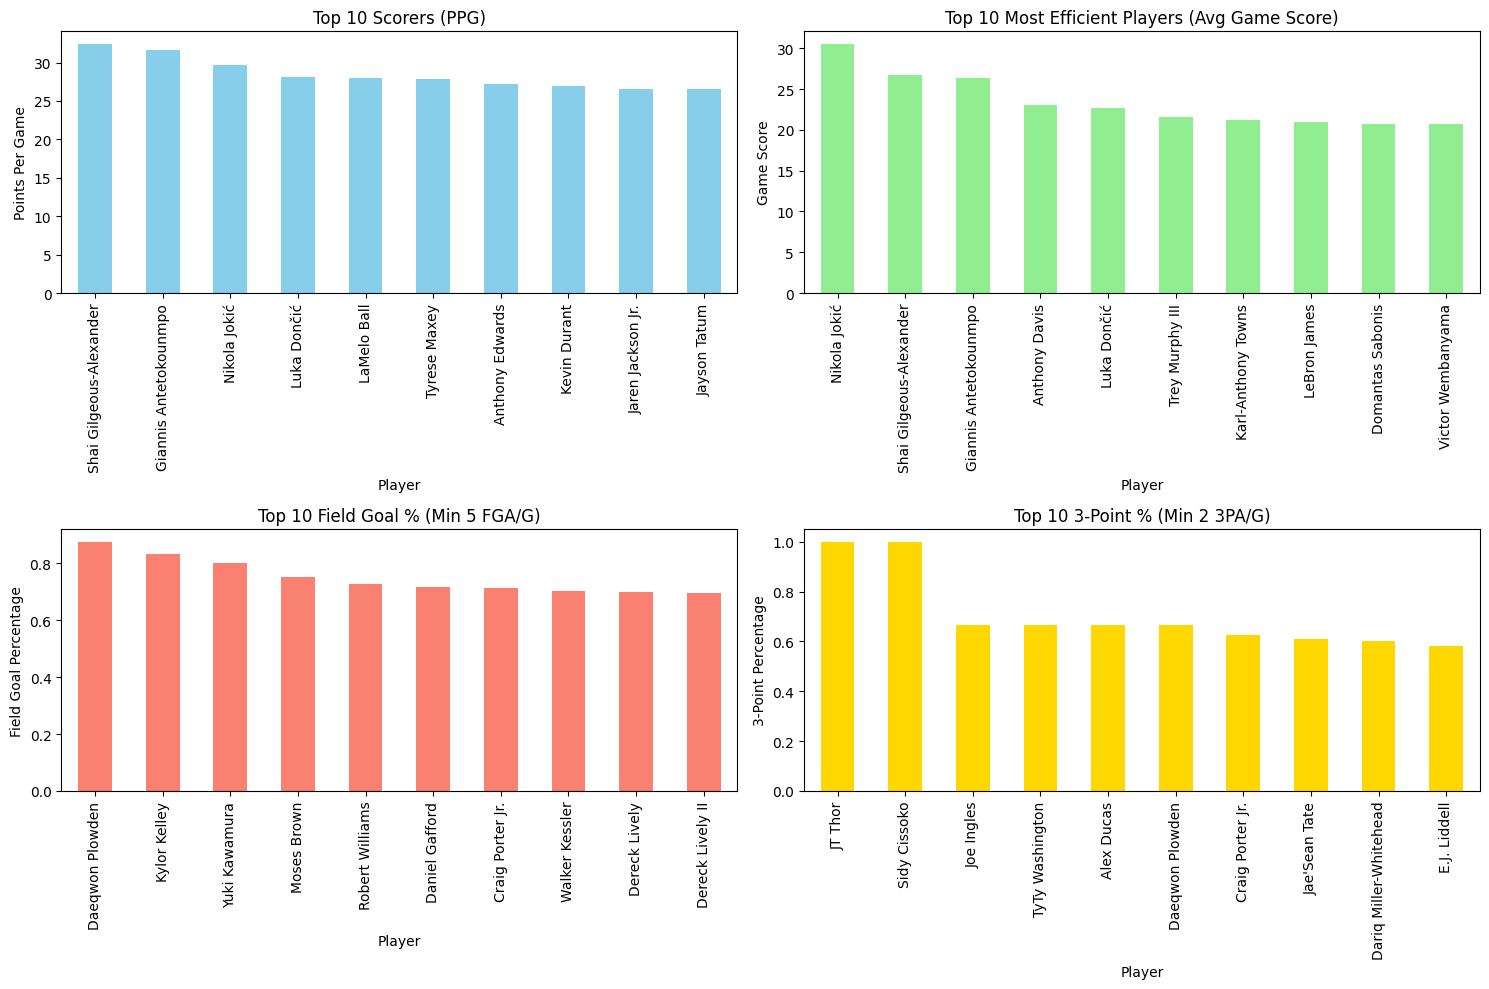

In [32]:
# Plotting
plt.figure(figsize=(15, 10))

# Call the top_performers function to define the variables
top_scorers, top_efficient, best_shooters, best_3pt_shooters = top_performers()

plt.subplot(2, 2, 1)
top_scorers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Scorers (PPG)')
plt.ylabel('Points Per Game')

plt.subplot(2, 2, 2)
top_efficient.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Most Efficient Players (Avg Game Score)')
plt.ylabel('Game Score')

plt.subplot(2, 2, 3)
best_shooters.plot(kind='bar', color='salmon')
plt.title('Top 10 Field Goal % (Min 5 FGA/G)')
plt.ylabel('Field Goal Percentage')

plt.subplot(2, 2, 4)
best_3pt_shooters.plot(kind='bar', color='gold')
plt.title('Top 10 3-Point % (Min 2 3PA/G)')
plt.ylabel('3-Point Percentage')

plt.tight_layout()
plt.show()

In [33]:
# 2. Team Performance Analysis
def team_analysis():
    # Calculate team averages
    team_stats = df.groupby('Tm').agg({
        'PTS': 'mean',
        'FG%': 'mean',
        '3P%': 'mean',
        'TRB': 'mean',
        'AST': 'mean',
        'GmSc': 'mean',
        'Res': lambda x: (x == 'W').mean()  # Win percentage
    }).sort_values('GmSc', ascending=False)

    print("\nTeam Performance Metrics:")
    print(team_stats)


Team Performance Metrics:
           PTS       FG%       3P%       TRB       AST      GmSc       Res
Tm                                                                        
NYK  11.723197  0.423887  0.264577  4.298246  2.748538  9.968226  0.680312
DEN  11.404719  0.454554  0.278038  4.308530  2.945554  9.933031  0.638838
ATL  11.764133  0.440665  0.268499  4.576998  2.945419  9.761598  0.446394
CLE  11.071304  0.458163  0.288270  4.033043  2.631304  9.500174  0.813913
BOS  11.105647  0.405015  0.256501  4.238616  2.459016  9.291803  0.697632
MEM  10.958333  0.452253  0.286220  4.241319  2.612847  9.193229  0.697917
LAL  11.030000  0.439394  0.255082  4.088000  2.606000  9.185200  0.614000
MIN  11.082061  0.429859  0.287004  4.358779  2.520992  8.995802  0.591603
PHO  10.732839  0.448887  0.263152  4.018553  2.591837  8.909833  0.493506
MIA  10.745136  0.414033  0.289825  4.274319  2.571984  8.822568  0.501946
IND  10.495463  0.447661  0.272817  3.773140  2.600726  8.819419  0.56261

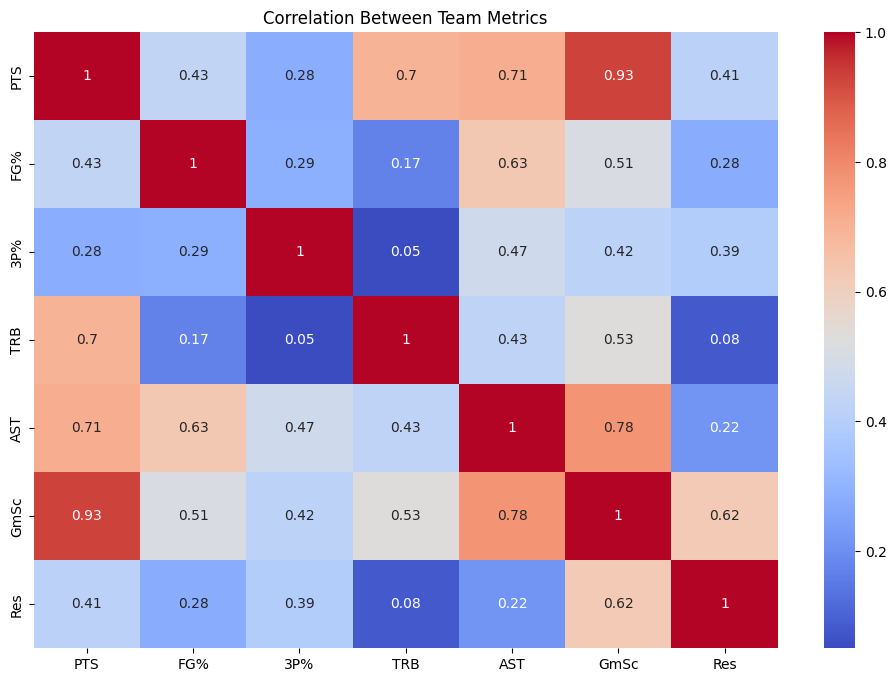

In [36]:
# 2. Team Performance Analysis
def team_analysis():
    # Calculate team averages
    team_stats = df.groupby('Tm').agg({
        'PTS': 'mean',
        'FG%': 'mean',
        '3P%': 'mean',
        'TRB': 'mean',
        'AST': 'mean',
        'GmSc': 'mean',
        'Res': lambda x: (x == 'W').mean()  # Win percentage
    }).sort_values('GmSc', ascending=False)

    print("\nTeam Performance Metrics:")
    print(team_stats)
    return team_stats # Return the team_stats DataFrame

# Call team_analysis to get the team_stats DataFrame
team_stats = team_analysis()

# Plotting team performance
plt.figure(figsize=(12, 8))
sns.heatmap(team_stats.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Team Metrics')
plt.show()

In [37]:
# 3. Player Comparison Tool
def compare_players(player1, player2):
    player1_stats = df[df['Player'] == player1].mean(numeric_only=True)
    player2_stats = df[df['Player'] == player2].mean(numeric_only=True)

    comparison = pd.DataFrame({player1: player1_stats, player2: player2_stats})

    # Select key metrics to display
    key_metrics = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'GmSc']
    print(f"\nComparison between {player1} and {player2}:")
    print(comparison.loc[key_metrics])

    # Plotting comparison
    plt.figure(figsize=(10, 6))
    comparison.loc[key_metrics].plot(kind='bar')
    plt.title(f'{player1} vs {player2} Comparison')
    plt.ylabel('Average per Game')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [38]:
# 4. Advanced Metrics Calculation
def advanced_metrics():
    # Calculate Player Efficiency Rating (PER) approximation
    df['PER_approx'] = (df['PTS'] + df['TRB'] + df['AST'] + df['STL'] + df['BLK']
                        - (df['FGA'] - df['FG']) - (df['FTA'] - df['FT']) - df['TOV'])

    # Calculate True Shooting Percentage
    df['TS%'] = df['PTS'] / (2 * (df['FGA'] + 0.44 * df['FTA']))

    # Top players by advanced metrics
    top_per = df.groupby('Player')['PER_approx'].mean().sort_values(ascending=False).head(10)
    top_ts = df[df['FGA'] >= 5].groupby('Player')['TS%'].mean().sort_values(ascending=False).head(10)

    # Plotting
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    top_per.plot(kind='bar', color='purple')
    plt.title('Top 10 Players by Approximate PER')
    plt.ylabel('PER Approximation')

    plt.subplot(1, 2, 2)
    top_ts.plot(kind='bar', color='orange')
    plt.title('Top 10 Players by TS% (Min 5 FGA/G)')
    plt.ylabel('True Shooting Percentage')

    plt.tight_layout()
    plt.show()


NBA 2024-2025 Season Stats Analyzer
1. Top Performers Analysis
2. Team Performance Analysis
3. Compare Two Players
4. Advanced Metrics
5. Game Day Analysis (YYYY-MM-DD)
6. Exit
Enter your choice (1-6): 3
Enter first player name: Anthony Edwards
Enter second player name: Ja Morant

Comparison between Anthony Edwards and Ja Morant:
      Anthony Edwards  Ja Morant
PTS         27.215686  20.666667
TRB          5.784314   4.166667
AST          4.529412   7.500000
STL          1.137255   1.333333
BLK          0.686275   0.300000
FG%          0.443843   0.460333
3P%          0.410333   0.313300
FT%          0.799451   0.780633
GmSc        18.784314  15.716667


<Figure size 1000x600 with 0 Axes>

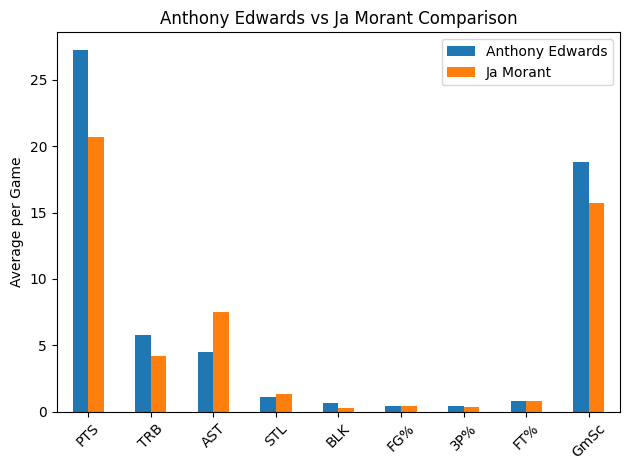


NBA 2024-2025 Season Stats Analyzer
1. Top Performers Analysis
2. Team Performance Analysis
3. Compare Two Players
4. Advanced Metrics
5. Game Day Analysis (YYYY-MM-DD)
6. Exit
Enter your choice (1-6): 4


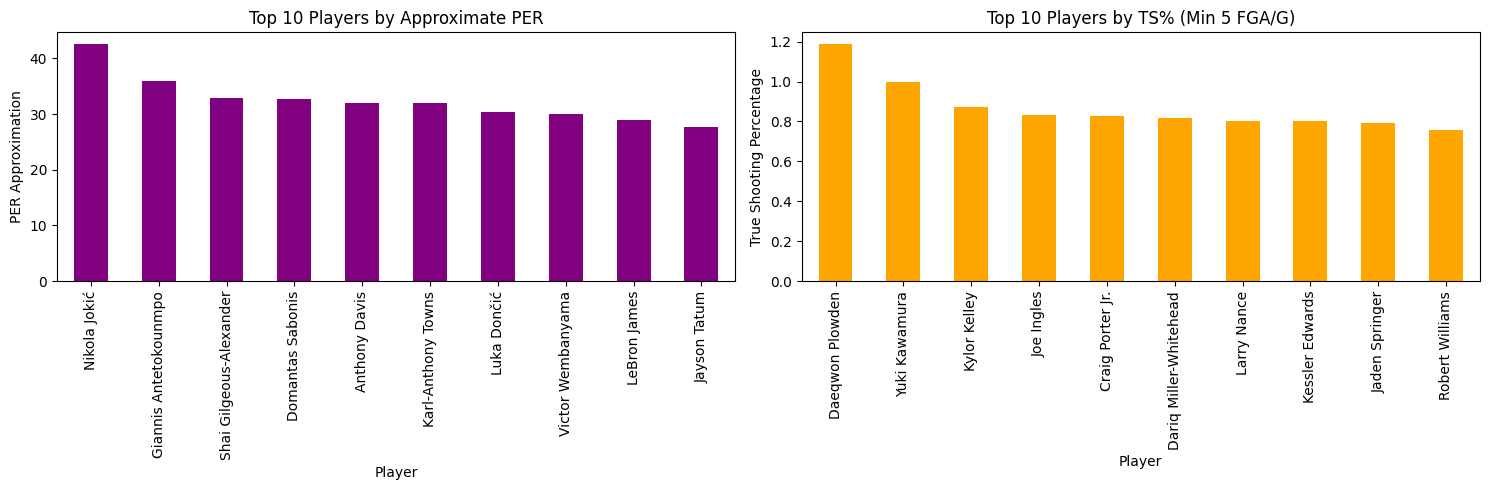


NBA 2024-2025 Season Stats Analyzer
1. Top Performers Analysis
2. Team Performance Analysis
3. Compare Two Players
4. Advanced Metrics
5. Game Day Analysis (YYYY-MM-DD)
6. Exit
Enter your choice (1-6): 1

NBA 2024-2025 Season Stats Analyzer
1. Top Performers Analysis
2. Team Performance Analysis
3. Compare Two Players
4. Advanced Metrics
5. Game Day Analysis (YYYY-MM-DD)
6. Exit
Enter your choice (1-6): 2

Team Performance Metrics:
           PTS       FG%       3P%       TRB       AST      GmSc       Res
Tm                                                                        
NYK  11.723197  0.423887  0.264577  4.298246  2.748538  9.968226  0.680312
DEN  11.404719  0.454554  0.278038  4.308530  2.945554  9.933031  0.638838
ATL  11.764133  0.440665  0.268499  4.576998  2.945419  9.761598  0.446394
CLE  11.071304  0.458163  0.288270  4.033043  2.631304  9.500174  0.813913
BOS  11.105647  0.405015  0.256501  4.238616  2.459016  9.291803  0.697632
MEM  10.958333  0.452253  0.286220  4.

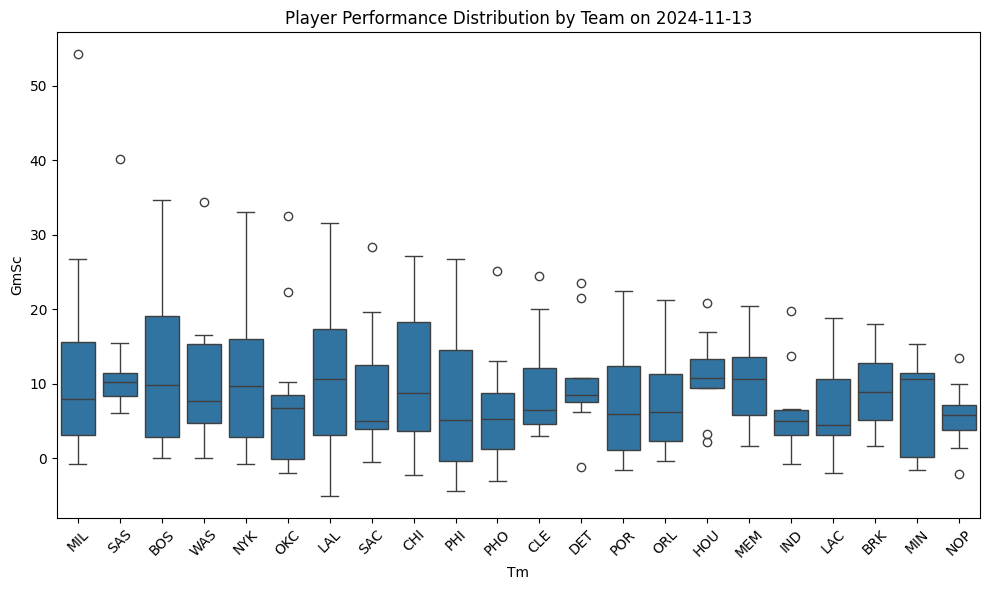


NBA 2024-2025 Season Stats Analyzer
1. Top Performers Analysis
2. Team Performance Analysis
3. Compare Two Players
4. Advanced Metrics
5. Game Day Analysis (YYYY-MM-DD)
6. Exit
Enter your choice (1-6): 6
Exiting...


In [40]:
# 5. Game-by-Game Analysis
def game_analysis(date):
    game_day = df[df['Data'] == date]

    if game_day.empty:
        print(f"No games found on {date}")
        return

    print(f"\nGames on {date}:")
    for _, game in game_day.groupby(['Tm', 'Opp']):
        teams = game['Tm'].iloc[0] + " vs " + game['Opp'].iloc[0]
        result = game['Res'].iloc[0]
        print(f"{teams} - {result}")

        # Top performers in the game
        top_3 = game.nlargest(3, 'GmSc')[['Player', 'PTS', 'TRB', 'AST', 'GmSc']]
        print("Top Performers:")
        print(top_3.to_string(index=False))
        print()

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Tm', y='GmSc', data=game_day)
    plt.title(f'Player Performance Distribution by Team on {date}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Main menu
def main():
    while True:
        print("\nNBA 2024-2025 Season Stats Analyzer")
        print("1. Top Performers Analysis")
        print("2. Team Performance Analysis")
        print("3. Compare Two Players")
        print("4. Advanced Metrics")
        print("5. Game Day Analysis (YYYY-MM-DD)")
        print("6. Exit")

        choice = input("Enter your choice (1-6): ")

        if choice == '1':
            top_performers()
        elif choice == '2':
            team_analysis()
        elif choice == '3':
            player1 = input("Enter first player name: ")
            player2 = input("Enter second player name: ")
            compare_players(player1, player2)
        elif choice == '4':
            advanced_metrics()
        elif choice == '5':
            date = input("Enter date to analyze (YYYY-MM-DD): ")
            game_analysis(date)
        elif choice == '6':
            print("Exiting...")
            break
        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()

**Features of this Analysis Tool:**

Top Performers Analysis:

Identifies top scorers, most efficient players, best shooters, and best 3-point shooters

Visualizes results with bar charts

Team Performance Analysis:

Calculates team averages for key metrics

Shows win percentages

Displays correlations between different team metrics

Player Comparison Tool:

Compares any two players across multiple statistics

Visualizes the comparison with a bar chart

Advanced Metrics Calculation:

Calculates approximate Player Efficiency Rating (PER)

Computes True Shooting Percentage (TS%)

Ranks players by these advanced metrics

Game-by-Game Analysis:

Shows results and top performers for any game date

Visualizes performance distribution by team